/var/folders/8f/djsv1z1s489f6j_h_d46t3rc0000gn/T/ipykernel_18099/3488557978.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


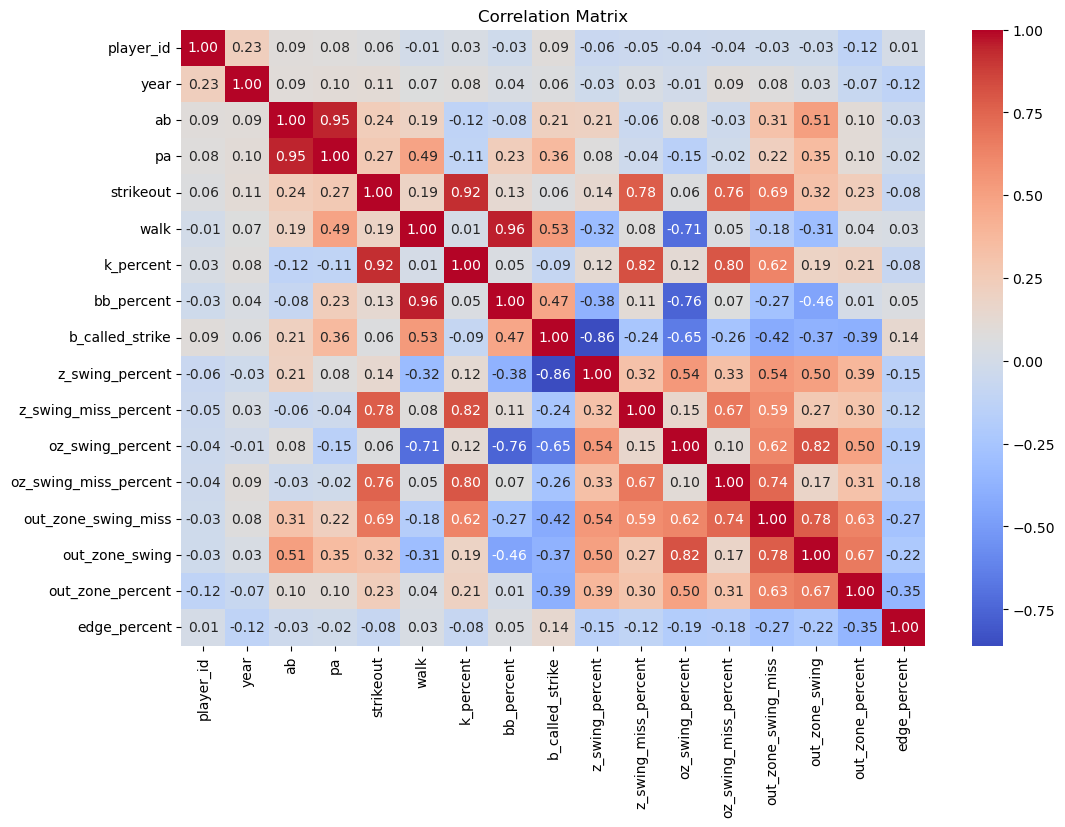

player_id               -0.009049
year                     0.067119
ab                       0.193684
pa                       0.490226
strikeout                0.190113
walk                     1.000000
k_percent                0.006822
bb_percent               0.955707
b_called_strike          0.528912
z_swing_percent         -0.319124
z_swing_miss_percent     0.083765
oz_swing_percent        -0.709255
oz_swing_miss_percent    0.053314
out_zone_swing_miss     -0.181379
out_zone_swing          -0.305962
out_zone_percent         0.042353
edge_percent             0.033511
Name: walk, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file into a pandas DataFrame
df = pd.read_csv('Statcast.csv')

# Calculate Pearson correlation coefficients
correlation_matrix = df.corr()

# Plot a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

walk_correlation = correlation_matrix['walk']  # Correlation of other variables with 'Walks'
print(walk_correlation)


In [3]:
import pandas as pd

# Read data from the CSV file
file_path = 'Statcast.csv'
df = pd.read_csv(file_path)

# Define weights for each category
weights = {
    'bb_percent': 0.4,            # Weight for bb_percent (strongest)
    'oz_swing_percent': -0.3,     # Weight for oz_swing_percent (higher values are worse)
    'b_called_strike': 0.2,       # Weight for b_called_strike
    'edge_percent': 0.1           # Weight for edge_percent (weakest)
}

# Calculate Zone Awareness Grade
df['Zone_Awareness_Grade'] = (
    weights['bb_percent'] * df['bb_percent'] +
    weights['oz_swing_percent'] * df['oz_swing_percent'] +
    weights['b_called_strike'] * df['b_called_strike'] +
    weights['edge_percent'] * df['edge_percent']
)

# Ensure non-negative ZAG values
df['Zone_Awareness_Grade'] = df['Zone_Awareness_Grade'].clip(lower=0)

# Find the maximum Zone Awareness Grade
max_grade = df['Zone_Awareness_Grade'].max()

# Manipulate the grades so that the maximum is 100
df['ZAG_Grading'] = (df['Zone_Awareness_Grade'] / max_grade) * 100

# Map the manipulated grades to a 0-100 scale for MLB_Grade
min_scale = 0
max_scale = 100
df['MLB_Grade'] = min_scale + ((df['ZAG_Grading'] - 0) / (100 - 0)) * (max_scale - min_scale)

# Round the MLB_Grade to the nearest whole number
df['MLB_Grade'] = df['MLB_Grade'].round()

# Create Scouting_Scale based on MLB_Grade
# Adjust the mapping based on your requirement
df['Scouting_Scale'] = df['MLB_Grade'].apply(lambda x: max(20, (x // 10) * 10))

# Save the updated DataFrame to a new CSV file with ZAG_Grading, MLB_Grade, Scouting_Scale columns
df.to_csv('ZAG_Grades.csv', index=False)

# Display the DataFrame with the calculated and scaled grade
print(df[['bb_percent', 'oz_swing_percent', 'b_called_strike', 'edge_percent', 'ZAG_Grading', 'MLB_Grade', 'Scouting_Scale']])



     bb_percent  oz_swing_percent  b_called_strike  edge_percent  ZAG_Grading  \
0           6.5              24.9              468          44.2    70.777297   
1          11.9              27.3              337          43.4    51.903351   
2           8.2              30.5              374          42.1    55.573285   
3           6.4              33.1              386          41.6    56.219132   
4          10.1              28.7              431          43.8    65.352177   
..          ...               ...              ...           ...          ...   
258        13.4              23.4              584          44.8    90.889750   
259         6.1              29.5              590          45.1    88.215181   
260         7.0              35.1              255          39.3    35.863536   
261        10.0              25.9              414          42.8    63.300661   
262         9.8              28.8              314          41.5    47.283641   

     MLB_Grade  Scouting_Sc

In [8]:
top_15 = df.nlargest(15, 'ZAG_Grading')
print(top_15[['Last_Name', 'First_Name', 'ZAG_Grading', 'MLB_Grade', 'Scouting_Scale']])


SyntaxError: incomplete input (4148628443.py, line 2)

In [15]:
top_100 = df.nlargest(100, 'ZAG_Grading')
print(top_100[['last_name, first_name', 'year', 'ZAG_Grading', 'MLB_Grade', 'Scouting_Scale']])

    last_name, first_name  year  ZAG_Grading  MLB_Grade  Scouting_Scale
129          Kwan, Steven  2022   100.000000      100.0           100.0
211         Kim, Ha-Seong  2023    98.921055       99.0            90.0
169       Schwarber, Kyle  2023    98.320796       98.0            90.0
142          Kwan, Steven  2023    95.995745       96.0            90.0
224            Soto, Juan  2023    92.728516       93.0            90.0
..                    ...   ...          ...        ...             ...
110       Swanson, Dansby  2022    61.765823       62.0            60.0
112          Edman, Tommy  2022    61.697439       62.0            60.0
228       Carroll, Corbin  2023    61.591065       62.0            60.0
184        Paredes, Isaac  2023    61.423904       61.0            60.0
196     Henderson, Gunnar  2023    61.408708       61.0            60.0

[100 rows x 5 columns]


In [16]:
import pandas as pd

# Read data from the CSV file
file_path = 'Statcast.csv'
df = pd.read_csv(file_path)

# Define weights for each category
weights = {
    'bb_percent': 0.4,            # Weight for bb_percent (strongest)
    'oz_swing_percent': -0.3,     # Weight for oz_swing_percent (higher values are worse)
    'b_called_strike': 0.2,       # Weight for b_called_strike
    'edge_percent': 0.1           # Weight for edge_percent (weakest)
}

# Calculate Zone Awareness Grade
df['Zone_Awareness_Grade'] = (
    weights['bb_percent'] * df['bb_percent'] +
    weights['oz_swing_percent'] * df['oz_swing_percent'] +
    weights['b_called_strike'] * df['b_called_strike'] +
    weights['edge_percent'] * df['edge_percent']
)

# Ensure non-negative ZAG values
df['Zone_Awareness_Grade'] = df['Zone_Awareness_Grade'].clip(lower=0)

# Find the maximum Zone Awareness Grade
max_grade = df['Zone_Awareness_Grade'].max()

# Manipulate the grades so that the maximum is 100
df['ZAG_Grading'] = (df['Zone_Awareness_Grade'] / max_grade) * 100

# Add a new column 'Overall_ZAG' without scaling and capping at 100
df['Overall_ZAG'] = df['Zone_Awareness_Grade']

# Map the manipulated grades to a 0-100 scale for MLB_Grade
min_scale = 0
max_scale = 100
df['MLB_Grade'] = min_scale + ((df['ZAG_Grading'] - 0) / (100 - 0)) * (max_scale - min_scale)

# Round the MLB_Grade to the nearest whole number
df['MLB_Grade'] = df['MLB_Grade'].round()

# Create Scouting_Scale based on MLB_Grade
# Adjust the mapping based on your requirement
df['Scouting_Scale'] = df['MLB_Grade'].apply(lambda x: max(20, (x // 10) * 10))

# Save the updated DataFrame to a new CSV file with ZAG_Grading, MLB_Grade, Scouting_Scale columns
df.to_csv('ZAG_Grades.csv', index=False)

# Display the DataFrame with the calculated and scaled grade
print(df[['bb_percent', 'oz_swing_percent', 'b_called_strike', 'edge_percent', 'ZAG_Grading', 'Overall_ZAG', 'MLB_Grade', 'Scouting_Scale']])


     bb_percent  oz_swing_percent  b_called_strike  edge_percent  ZAG_Grading  \
0           6.5              24.9              468          44.2    70.777297   
1          11.9              27.3              337          43.4    51.903351   
2           8.2              30.5              374          42.1    55.573285   
3           6.4              33.1              386          41.6    56.219132   
4          10.1              28.7              431          43.8    65.352177   
..          ...               ...              ...           ...          ...   
258        13.4              23.4              584          44.8    90.889750   
259         6.1              29.5              590          45.1    88.215181   
260         7.0              35.1              255          39.3    35.863536   
261        10.0              25.9              414          42.8    63.300661   
262         9.8              28.8              314          41.5    47.283641   

     Overall_ZAG  MLB_Grade

In [19]:
import pandas as pd

# Read data from the CSV file
file_path = 'ZAG_Grades.csv'
df = pd.read_csv(file_path)

# Display a snippet of all columns in the DataFrame
print(df.head())

    last_name, first_name  player_id  year   ab   pa  strikeout  walk  \
0           Verdugo, Alex     657077  2022  593  644         86    42   
1        Freeman, Freddie     518692  2022  612  708        102    84   
2  Guerrero Jr., Vladimir     665489  2022  638  706        116    58   
3            Turner, Trea     607208  2022  652  708        131    45   
4           Ramirez, Jose     608070  2022  601  685         82    69   

   k_percent  bb_percent  b_called_strike  ...  oz_swing_miss_percent  \
0       13.4         6.5              468  ...                   32.0   
1       14.4        11.9              337  ...                   32.2   
2       16.4         8.2              374  ...                   41.4   
3       18.5         6.4              386  ...                   46.3   
4       12.0        10.1              431  ...                   26.4   

   out_zone_swing_miss  out_zone_swing  out_zone_percent  edge_percent  \
0                   95             297          

In [20]:
import pandas as pd

# Read data from the CSV file
file_path = 'ZAG_Grades.csv'
df = pd.read_csv(file_path)

# Delete the columns 'Zone_Awareness_Grade' and 'ZAG_Grading'
df.drop(['Zone_Awareness_Grade', 'ZAG_Grading'], axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
df.to_csv('Updated_ZAG_Grades.csv', index=False)

# Display a snippet of the updated DataFrame
print(df.head())

    last_name, first_name  player_id  year   ab   pa  strikeout  walk  \
0           Verdugo, Alex     657077  2022  593  644         86    42   
1        Freeman, Freddie     518692  2022  612  708        102    84   
2  Guerrero Jr., Vladimir     665489  2022  638  706        116    58   
3            Turner, Trea     607208  2022  652  708        131    45   
4           Ramirez, Jose     608070  2022  601  685         82    69   

   k_percent  bb_percent  b_called_strike  ...  z_swing_miss_percent  \
0       13.4         6.5              468  ...                   9.6   
1       14.4        11.9              337  ...                  14.2   
2       16.4         8.2              374  ...                  16.2   
3       18.5         6.4              386  ...                  15.5   
4       12.0        10.1              431  ...                   9.5   

   oz_swing_percent  oz_swing_miss_percent  out_zone_swing_miss  \
0              24.9                   32.0                   

In [28]:
import pandas as pd

# Read data from the CSV file
file_path = 'Final_ZAG_Grades.csv'
df = pd.read_csv(file_path)

# Drop the 'ZAG_Letter_Grade' column
df = df.drop(columns=['ZAG_Letter_Grade'])

# Save the updated DataFrame to a new CSV file
df.to_csv('Final_ZAG_Grades_No_Letter_Grade.csv', index=False)

# Display the DataFrame without the 'ZAG_Letter_Grade' column
print(df)


      last_name, first_name  player_id  year   ab   pa  strikeout  walk  \
0             Verdugo, Alex     657077  2022  593  644         86    42   
1          Freeman, Freddie     518692  2022  612  708        102    84   
2    Guerrero Jr., Vladimir     665489  2022  638  706        116    58   
3              Turner, Trea     607208  2022  652  708        131    45   
4             Ramirez, Jose     608070  2022  601  685         82    69   
..                      ...        ...   ...  ...  ...        ...   ...   
258        Rutschman, Adley     668939  2023  588  687        101    92   
259           Stott, Bryson     681082  2023  585  640        100    39   
260           Albies, Ozzie     645277  2023  596  660        107    46   
261         Torres, Gleyber     650402  2023  596  672         98    67   
262  Guerrero Jr., Vladimir     665489  2023  602  682        100    67   

     k_percent  bb_percent  b_called_strike  ...  z_swing_miss_percent  \
0         13.4         6.

In [29]:
import pandas as pd

# Read data from the CSV file
file_path = 'Final_ZAG_Grades.csv'
df = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['MLB_Grade', 'Scouting_Scale', 'ZAG_Letter_Grade']
df = df.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
df.to_csv('Final_ZAG_Grades_No_Grades.csv', index=False)

# Display the DataFrame without the specified columns
print(df)


      last_name, first_name  player_id  year   ab   pa  strikeout  walk  \
0             Verdugo, Alex     657077  2022  593  644         86    42   
1          Freeman, Freddie     518692  2022  612  708        102    84   
2    Guerrero Jr., Vladimir     665489  2022  638  706        116    58   
3              Turner, Trea     607208  2022  652  708        131    45   
4             Ramirez, Jose     608070  2022  601  685         82    69   
..                      ...        ...   ...  ...  ...        ...   ...   
258        Rutschman, Adley     668939  2023  588  687        101    92   
259           Stott, Bryson     681082  2023  585  640        100    39   
260           Albies, Ozzie     645277  2023  596  660        107    46   
261         Torres, Gleyber     650402  2023  596  672         98    67   
262  Guerrero Jr., Vladimir     665489  2023  602  682        100    67   

     k_percent  bb_percent  b_called_strike  z_swing_percent  \
0         13.4         6.5         

In [30]:
import pandas as pd
from scipy.stats import percentileofscore

# Read data from the CSV file
file_path = 'Final_ZAG_Grades_No_Grades.csv'
df = pd.read_csv(file_path)

# Calculate the ZAG Percentile based on 'Overall_ZAG'
df['ZAG_Percentile'] = df['Overall_ZAG'].apply(lambda x: percentileofscore(df['Overall_ZAG'], x, kind='rank'))

# Save the updated DataFrame to a new CSV file
df.to_csv('Final_ZAG_Grades_With_Percentile.csv', index=False)

# Display the DataFrame with the new 'ZAG_Percentile' column
print(df[['last_name, first_name', 'Overall_ZAG', 'ZAG_Percentile']])


      last_name, first_name  Overall_ZAG  ZAG_Percentile
0             Verdugo, Alex        93.15       81.749049
1          Freeman, Freddie        68.31       36.121673
2    Guerrero Jr., Vladimir        73.14       47.908745
3              Turner, Trea        73.99       49.809886
4             Ramirez, Jose        86.01       71.102662
..                      ...          ...             ...
258        Rutschman, Adley       119.62       98.098859
259           Stott, Bryson       116.10       96.958175
260           Albies, Ozzie        47.20        8.745247
261         Torres, Gleyber        83.31       66.920152
262  Guerrero Jr., Vladimir        62.23       25.475285

[263 rows x 3 columns]


In [31]:
import pandas as pd
from scipy.stats import percentileofscore

# Read data from the CSV file
file_path = 'Final_ZAG_Grades_With_Percentile.csv'
df = pd.read_csv(file_path)

# Get the top 5 rows based on 'Overall_ZAG'
top_5 = df.nlargest(5, 'Overall_ZAG')[['last_name, first_name', 'Overall_ZAG', 'ZAG_Percentile']]

# Display the top 5 players in 'last name, first name' order with their 'Overall_ZAG' and 'ZAG_Percentile'
print(top_5)


    last_name, first_name  Overall_ZAG  ZAG_Percentile
129          Kwan, Steven       131.61      100.000000
211         Kim, Ha-Seong       130.19       99.619772
169       Schwarber, Kyle       129.40       99.239544
142          Kwan, Steven       126.34       98.859316
224            Soto, Juan       122.04       98.479087


In [32]:
import pandas as pd

# Read data from the CSV file
file_path = 'Final_ZAG_Grades_With_Percentile.csv'
df = pd.read_csv(file_path)

# Calculate Scaled ZAG
min_value = df['Overall_ZAG'].min()
max_value = df['Overall_ZAG'].max()
df['Scaled_ZAG'] = 1 + ((df['Overall_ZAG'] - min_value) / (max_value - min_value)) * 99

# Save the updated DataFrame to a new CSV file
df.to_csv('Final_ZAG_Grades_With_Scaled_ZAG.csv', index=False)

# Display the DataFrame with the new 'Scaled_ZAG' column
print(df[['last_name, first_name', 'Overall_ZAG', 'ZAG_Percentile', 'Scaled_ZAG']])


      last_name, first_name  Overall_ZAG  ZAG_Percentile  Scaled_ZAG
0             Verdugo, Alex        93.15       81.749049   63.550258
1          Freeman, Freddie        68.31       36.121673   40.008616
2    Guerrero Jr., Vladimir        73.14       47.908745   44.586157
3              Turner, Trea        73.99       49.809886   45.391729
4             Ramirez, Jose        86.01       71.102662   56.783458
..                      ...          ...             ...         ...
258        Rutschman, Adley       119.62       98.098859   88.636703
259           Stott, Bryson       116.10       96.958175   85.300689
260           Albies, Ozzie        47.20        8.745247   20.002010
261         Torres, Gleyber        83.31       66.920152   54.224584
262  Guerrero Jr., Vladimir        62.23       25.475285   34.246410

[263 rows x 4 columns]


In [33]:
import pandas as pd

# Read data from the CSV file
file_path = 'Final_ZAG_Grades_With_Scaled_ZAG.csv'
df = pd.read_csv(file_path)

# Filter for players qualified in the year 2022
qualified_2022 = df[df['year'] == 2022]

# Save the filtered DataFrame to a new CSV file
qualified_2022.to_csv('Qualified_Players_2022.csv', index=False)

# Display the filtered DataFrame
print(qualified_2022)


      last_name, first_name  player_id  year   ab   pa  strikeout  walk  \
0             Verdugo, Alex     657077  2022  593  644         86    42   
1          Freeman, Freddie     518692  2022  612  708        102    84   
2    Guerrero Jr., Vladimir     665489  2022  638  706        116    58   
3              Turner, Trea     607208  2022  652  708        131    45   
4             Ramirez, Jose     608070  2022  601  685         82    69   
..                      ...        ...   ...  ...  ...        ...   ...   
125             Abreu, Jose     547989  2022  601  679        110    62   
126            Bichette, Bo     666182  2022  652  697        155    41   
127       Lindor, Francisco     596019  2022  630  706        133    59   
128            Arraez, Luis     650333  2022  547  603         43    50   
129            Kwan, Steven     680757  2022  563  638         60    62   

     k_percent  bb_percent  b_called_strike  ...  z_swing_miss_percent  \
0         13.4         6.

In [34]:
import pandas as pd

# Read data from the CSV file
file_path = 'Final_ZAG_Grades_With_Scaled_ZAG.csv'
df = pd.read_csv(file_path)

# Filter for players qualified in the year 2023
qualified_2022 = df[df['year'] == 2023]

# Save the filtered DataFrame to a new CSV file
qualified_2022.to_csv('Qualified_Players_2023.csv', index=False)

# Display the filtered DataFrame
print(qualified_2022)


      last_name, first_name  player_id  year   ab   pa  strikeout  walk  \
130        Freeman, Freddie     518692  2023  637  730        121    72   
131            McNeil, Jeff     643446  2023  585  648         65    39   
132         Witt Jr., Bobby     677951  2023  641  694        121    40   
133          Suwinski, Jack     669261  2023  447  534        172    75   
134           Bregman, Alex     608324  2023  622  724         87    92   
..                      ...        ...   ...  ...  ...        ...   ...   
258        Rutschman, Adley     668939  2023  588  687        101    92   
259           Stott, Bryson     681082  2023  585  640        100    39   
260           Albies, Ozzie     645277  2023  596  660        107    46   
261         Torres, Gleyber     650402  2023  596  672         98    67   
262  Guerrero Jr., Vladimir     665489  2023  602  682        100    67   

     k_percent  bb_percent  b_called_strike  ...  z_swing_miss_percent  \
130       16.6         9.

In [36]:
import pandas as pd

# Read data from the CSV file with Scaled ZAG
file_path_scaled_zag = 'Final_ZAG_Grades_With_Scaled_ZAG.csv'
df_scaled_zag = pd.read_csv(file_path_scaled_zag)

# Drop the specified columns from the DataFrame
columns_to_drop = ['ab', 'pa', 'strikeout', 'out_zone_swing', 'out_zone_percent', 'out_zone_swing_miss', 'oz_swing_miss_percent', 'z_swing_percent', 'z_swing_miss_percent']
df_scaled_zag = df_scaled_zag.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
df_scaled_zag.to_csv('Final_ZAG_Grades_With_Scaled_ZAG_No_Columns.csv', index=False)

# Display the DataFrame with the specified columns removed
print(df_scaled_zag)

# Read data from the CSV file with Qualified Players in 2022
file_path_qualified_2022 = 'Qualified_Players_2022.csv'
df_qualified_2022 = pd.read_csv(file_path_qualified_2022)

# Drop the specified columns from the DataFrame
df_qualified_2022 = df_qualified_2022.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
df_qualified_2022.to_csv('Qualified_Players_2022_No_Columns.csv', index=False)

# Display the DataFrame with the specified columns removed
print(df_qualified_2022)


      last_name, first_name  player_id  year  walk  k_percent  bb_percent  \
0             Verdugo, Alex     657077  2022    42       13.4         6.5   
1          Freeman, Freddie     518692  2022    84       14.4        11.9   
2    Guerrero Jr., Vladimir     665489  2022    58       16.4         8.2   
3              Turner, Trea     607208  2022    45       18.5         6.4   
4             Ramirez, Jose     608070  2022    69       12.0        10.1   
..                      ...        ...   ...   ...        ...         ...   
258        Rutschman, Adley     668939  2023    92       14.7        13.4   
259           Stott, Bryson     681082  2023    39       15.6         6.1   
260           Albies, Ozzie     645277  2023    46       16.2         7.0   
261         Torres, Gleyber     650402  2023    67       14.6        10.0   
262  Guerrero Jr., Vladimir     665489  2023    67       14.7         9.8   

     b_called_strike  oz_swing_percent  edge_percent  Overall_ZAG  \
0     

In [37]:
import os

# Define the current file names
current_file_scaled_zag = 'Final_ZAG_Grades_With_Scaled_ZAG_No_Columns.csv'
current_file_qualified_2022 = 'Qualified_Players_2022_No_Columns.csv'

# Define the new file names
new_file_scaled_zag = 'ZAG2022.csv'
new_file_qualified_2022 = 'ZAG2023.csv'

# Rename the files
os.rename(current_file_scaled_zag, new_file_scaled_zag)
os.rename(current_file_qualified_2022, new_file_qualified_2022)

# Display a message indicating the files have been renamed
print(f'The files have been renamed to {new_file_scaled_zag} and {new_file_qualified_2022}.')


The files have been renamed to ZAG2022.csv and ZAG2023.csv.


In [38]:
import pandas as pd

# Define the file names
file_zag2022 = 'ZAG2022.csv'
file_zag2023 = 'ZAG2023.csv'

# Read data from the CSV files
df_zag2022 = pd.read_csv(file_zag2022)
df_zag2023 = pd.read_csv(file_zag2023)

# Concatenate the DataFrames vertically
df_zag_all = pd.concat([df_zag2022, df_zag2023], ignore_index=True)

# Save the combined DataFrame to a new CSV file
file_zag_all = 'ZAG-ALL.csv'
df_zag_all.to_csv(file_zag_all, index=False)

# Display the combined DataFrame
print(df_zag_all)


      last_name, first_name  player_id  year  walk  k_percent  bb_percent  \
0             Verdugo, Alex     657077  2022    42       13.4         6.5   
1          Freeman, Freddie     518692  2022    84       14.4        11.9   
2    Guerrero Jr., Vladimir     665489  2022    58       16.4         8.2   
3              Turner, Trea     607208  2022    45       18.5         6.4   
4             Ramirez, Jose     608070  2022    69       12.0        10.1   
..                      ...        ...   ...   ...        ...         ...   
388             Abreu, Jose     547989  2022    62       16.2         9.1   
389            Bichette, Bo     666182  2022    41       22.2         5.9   
390       Lindor, Francisco     596019  2022    59       18.8         8.4   
391            Arraez, Luis     650333  2022    50        7.1         8.3   
392            Kwan, Steven     680757  2022    62        9.4         9.7   

     b_called_strike  oz_swing_percent  edge_percent  Overall_ZAG  \
0     